## <span style="color:white;background-color:GREY;">INTRODUCTION</span>
Term deposits are a type of fixed investment where customers deposit money with a financial institution for a predetermined   period at an agreed interest rate. These deposits are a reliable and significant source of income for banks, as they provide a  stable inflow of funds while offering customers a secure way to grow their savings.  
To promote term deposits, banks employ various marketing strategies, including email marketing, advertisements, digital   outreach, and telephonic campaigns. Among these, telephonic marketing remains one of the most effective methods for engaging   customers. However, this approach involves substantial costs due to the operational requirements of large call centers.     

## <span style="color:white;background-color:GREY;">BUSINESS PROBLEM</span>
Telephonic marketing is an effective but costly method for promoting term deposits. To optimize resources and improve   conversion rates, the bank needs to identify customers most likely to subscribe to a term deposit before reaching out, ensuring   more targeted and cost-efficient marketing efforts.  

## <span style="color:white;background-color:GREY;">OBJECTIVES</span>

1. **Identify Key Predictors**: Analyze customer demographics, previous interactions, and campaign details to determine the most important factors influencing a customer’s decision to subscribe to a term deposit.

2. **Develop the Best Prediction Model**: Build and evaluate multiple classification models to identify the most accurate model for predicting whether a customer will subscribe to a term deposit, ensuring optimal performance.

3. **Optimize Marketing Strategies**: Use the insights from the model to recommend targeted telephonic marketing strategies, focusing on high-potential customers to maximize conversion rates and reduce unnecessary outreach.
### Metrics of Success:

1. **Model Accuracy:** Achieve over 80% accuracy in predicting customer subscription to a term deposit.
2. **Precision & Recall:** High precision and recall for identifying customers likely to subscribe (Class 1).
3. **Feature Importance:** Identify key factors influencing subscription decisions to optimize marketing strategies.
4. **Conversion Rate:** Increase conversion rates by targeting high-potential customers.
5. **Outreach Efficiency:** Reduce unnecessary outreach to non-potential customers.
6. **Cross-validation Performance:** Ensure consistent performance across different data subsets to avoid overfitting.

## <span style="color:white;background-color:GREY;">DATA UNDERSTANDING</span>
This dataset is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were conducted through phone calls, often requiring multiple contacts with the same client to determine whether they would subscribe to the product (bank term deposit). The target variable indicates whether the client subscribed (`"yes"`) or not (`"no"`).
### Dataset Overview
The data folder contains two datasets:

- **`train.csv`**: Contains 45,211 rows and 18 columns, ordered by date (from May 2008 to November 2010).
- **`test.csv`**: Contains 4,521 rows and 18 columns, representing 10% of the examples, randomly selected from `train.csv`.
### Column Descriptions
#### Bank Client Data:
1. **`age`**: Age of the client (numeric).
2. **`job`**: Type of job (categorical: `"admin."`, `"unknown"`, `"unemployed"`, `"management"`, `"housemaid"`, `"entrepreneur"`, `"student"`, `"blue-collar"`, `"self-employed"`, `"retired"`, `"technician"`, `"services"`).
3. **`marital`**: Marital status (categorical: `"married"`, `"divorced"`, `"single"`; note: `"divorced"` includes divorced or widowed).
4. **`education`**: Level of education (categorical: `"unknown"`, `"secondary"`, `"primary"`, `"tertiary"`).
5. **`default`**: Has credit in default? (binary: `"yes"`, `"no"`).
6. **`balance`**: Average yearly balance in euros (numeric).
7. **`housing`**: Has a housing loan? (binary: `"yes"`, `"no"`).
8. **`loan`**: Has a personal loan? (binary: `"yes"`, `"no"`).
#### Last Contact of Current Campaign:
9. **`contact`**: Contact communication type (categorical: `"unknown"`, `"telephone"`, `"cellular"`).
10. **`day`**: Last contact day of the month (numeric).
11. **`month`**: Last contact month of the year (categorical: `"jan"`, `"feb"`, `"mar"`, …, `"nov"`, `"dec"`).
12. **`duration`**: Last contact duration in seconds (numeric).
#### Other Attributes:
13. **`campaign`**: Number of contacts performed during this campaign for this client (numeric, includes last contact).
14. **`pdays`**: Number of days since the client was last contacted in a previous campaign (numeric; `-1` means the client was not previously contacted).
15. **`previous`**: Number of contacts performed before this campaign for this client (numeric).
16. **`poutcome`**: Outcome of the previous marketing campaign (categorical: `"unknown"`, `"other"`, `"failure"`, `"success"`).
#### Output Variable (Target):
17. **`y`**: Has the client subscribed to a term deposit? (binary: `"yes"`, `"no"`).  

Data source: https://www.kaggle.com/datasets/thedevastator/bank-term-deposit-predictions?resource=download

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import summarytools as st
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
train_data=pd.read_csv('train.csv')
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
train_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
st.dfSummary(train_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,age[int64],Mean (sd) : 40.9 (10.6)min < med < max:18.0 < 39.0 < 95.0IQR (CV) : 15.0 (3.9),77 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxUlEQVR4nO3dMYrbQACG0UlI4WbDGFwuqM8WukHYM4ic0aXOkBPsDVIYUgbs0lHjtCGQbBhJWP/yXj8wxQfjkWekd7fbrcDWvb/3BOB/CJUIH+49gX/puu651npoGXu5XH6cTqevC0+JO9l0qLXWwzAMP1vGjuPYFDjbZOknglCJIFQiCJUIq26m5uzaSyllmqanUsrLglMi1Kqhztm1l1LKOI4PS86HXJZ+IgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIm34BxRzX6/VT3/dfWsd708q2vNlQd7vdx5n3tbxpZUMs/UQQKhGESoQ3+xt1rjmbMRux5Qn1L+ZsxmzElmfpJ4JQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlghP+K3CNZXlCXYFrLMuz9BNBqEQQKhGESgShEkGoRBAqEYRKhFcf+Hdd91xrbXoIPU3TUynlpWUs/O7VUGuthxn/sjy0jIM/WfqJIFQiCJUITk9tzNzPDp3P58f9fv+9ZeyWjxgKdWMW+OzQ4zAM31rGHo/Hz33fNx8zXDP0X6tFbvntcy30AAAAAElFTkSuQmCC"">",0(0.0%)
2,job[object],1. blue-collar2. management3. technician4. admin.5. services6. retired7. self-employed8. entrepreneur9. unemployed10. housemaid11. other,"9,732 (21.5%)9,458 (20.9%)7,597 (16.8%)5,171 (11.4%)4,154 (9.2%)2,264 (5.0%)1,579 (3.5%)1,487 (3.3%)1,303 (2.9%)1,240 (2.7%)1,226 (2.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADR0lEQVR4nO3csW0CQRRFUWO5gA0cU4troFBqcCvkBJM6wgWAtALt3gk4pwEmuNIXEo/D7Xb7gMLn7AfwPsRGRmxkxEZGbGTERkZsZMRGRmxkxEbmcDwef5Zl+Z75iDHG9XK5/M58A/v7Wpbl+3Q6/c18xPl8nho7DWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Mh8jTGus3+8OMa4zvx8Ggf/YkTFGSUjNjLT11WWVe9j+rpq9pcTOs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZ6YMXY5f3YfBCxhklIzYy2eDFsIVs8GLYgjNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEYmG7wYtmDwQsYZJSM2MmIjs9m6ynqKNZutq6ynWOOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGR2WxdZT3FGusqMs4oGbGReXnwYuDCs14evBi48CxnlIzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzMuDFwMXnmXwQsYZJSM2MquDF8MWtrI6eDFsYSvOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRWV1XWVGxFesqMs4oGbGRebiusqhiDw/XVRZV7MEZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIj83DwYuTCHgxeyDijZMRGxuCFjMELGWeUjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyzigZsZERG5m7dZVlFXu5W1dZVrEXZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjczdusqyir1YV5FxRsmIjYzBCxmDFzLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyPwDvlgWyWWiW74AAAAASUVORK5CYII="">",0(0.0%)
3,marital[object],1. married2. single3. divorced,"27,214 (60.2%)12,790 (28.3%)5,207 (11.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABM0lEQVR4nO3bsW0CQRRFUWNRwAbE1OIaKJQa3Ao5waSO1iWQoDta5pwKJrjoayXead/3Lyh8z34A6xAbmdP1ev3Ztu0y+yErGWM8H4/H7+x31M7btl1ut9vf7Ies5H6/L/njdkbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcx5jPFc9c98s4wxnrPfMMPJuoqKM0pGbGQOt65adZn0CQ63rvIxc1zOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGROdy6atVl0iewriLjjJIRGxmxkXnblM/EjlfeNuU70hctczijZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbmbVM+EzteMeUj44yS+QeW604wM81WtAAAAABJRU5ErkJggg=="">",0(0.0%)
4,education[object],1. secondary2. tertiary3. primary4. unknown,"23,202 (51.3%)13,301 (29.4%)6,851 (15.2%)1,857 (4.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABeklEQVR4nO3bsW0CQRRFUWNRwAbE1OIaKJQa3Ao5waSOlpQEybLYuxr5nAomuOhrJd5hXdcPKHzu/QD+D7GRERuZw/l8/lqW5bT3Q2Y1xrjfbrfvvd8xg+OyLKfL5fKz90Nmdb1e/VB/yRklIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNzHGPc/Sfr78YY973fMIuDdRUVZ5SM2MiIjcy06yqrpvlMu67yBT0fZ

In [6]:
# Loop through all categorical columns and display their value counts transposed
for col in train_data.select_dtypes(include=['object', 'category']).columns:
    print(f"\n{col.upper()} Value Counts (Transposed):\n")
    value_counts = train_data[col].value_counts(dropna=False)
    print(pd.DataFrame(value_counts).T)
    print("-" * 50)


JOB Value Counts (Transposed):

job    blue-collar  management  technician  admin.  services  retired  \
count         9732        9458        7597    5171      4154     2264   

job    self-employed  entrepreneur  unemployed  housemaid  student  unknown  
count           1579          1487        1303       1240      938      288  
--------------------------------------------------

MARITAL Value Counts (Transposed):

marital  married  single  divorced
count      27214   12790      5207
--------------------------------------------------

EDUCATION Value Counts (Transposed):

education  secondary  tertiary  primary  unknown
count          23202     13301     6851     1857
--------------------------------------------------

DEFAULT Value Counts (Transposed):

default     no  yes
count    44396  815
--------------------------------------------------

HOUSING Value Counts (Transposed):

housing    yes     no
count    25130  20081
--------------------------------------------------

LOAN V

In [7]:
train_data.shape

(45211, 17)

In [8]:
test_data=pd.read_csv('test.csv')

In [9]:
test_data.shape

(4521, 17)

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [11]:
test_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

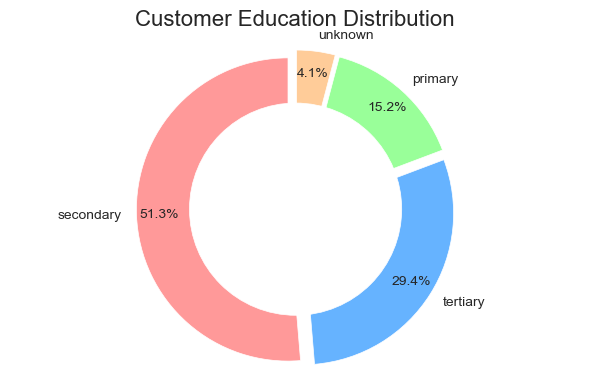

In [12]:
# Calculate education counts
eduCounts = train_data['education'].value_counts()

# Define colors and labels
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
labels = eduCounts.index  # Use the index of eduCounts for dynamic labels

# Create the pie chart
plt.figure(figsize=(6, 4))
plt.pie(
    eduCounts,
    colors=colors,
    labels=labels,
    autopct='%1.1f%%',
    pctdistance=0.85,
    explode=[0.05] * len(eduCounts),  # Dynamically set explode values for all segments
    startangle=90,  # Start the pie chart at 90 degrees for better alignment
)

# Add a white circle at the center for a donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Add chart title
plt.title('Customer Education Distribution', fontsize=16)

# Equal aspect ratio ensures the pie chart is drawn as a circle
plt.axis('equal')

# Display the chart
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

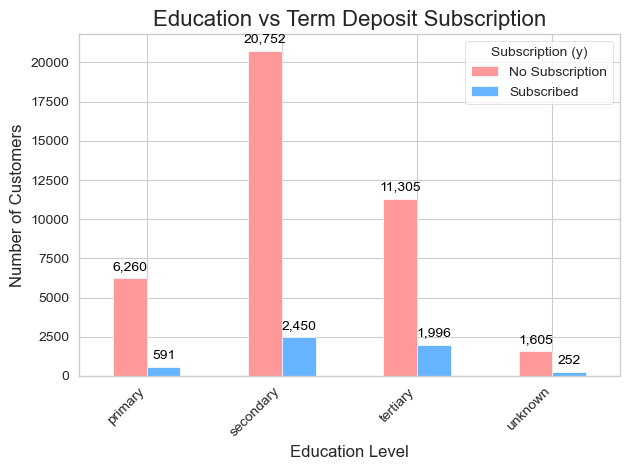

In [13]:

# Group by 'education' and 'y', then count the number of occurrences
edu_y_counts = train_data.groupby(['education', 'y']).size().unstack()

# Create the bar graph
plt.figure(figsize=(10, 6))
ax = edu_y_counts.plot(kind='bar', stacked=False, color=['#FF9999', '#66B3FF'])

# Add chart title and labels
plt.title('Education vs Term Deposit Subscription', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Show the legend and adjust the position
plt.legend(title='Subscription (y)', labels=['No Subscription', 'Subscribed'], loc='upper right')

# Add the bar labels with commas and display them on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',  # Format the number with commas
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), textcoords='offset points')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

C:\Users\rkeoye\AppData\Local\Temp\ipykernel_23372\989768863.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edu_y_counts = train_data.groupby(['balance_category', 'y']).size().unstack()


<Figure size 1000x600 with 0 Axes>

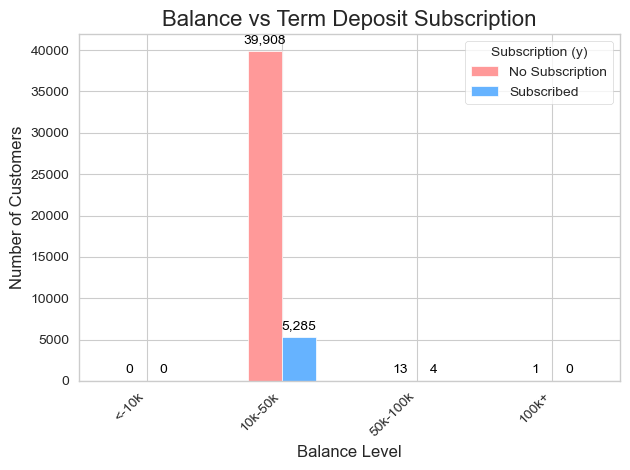

In [14]:

# Create the bins and labels for balance categories
balance_bins = [-float('inf'), -10000, 50000, 100000, float('inf')]
balance_labels = ['<-10k', '10k-50k', '50k-100k', '100k+']

# Apply pd.cut to categorize 'balance' into the defined bins
train_data['balance_category'] = pd.cut(train_data['balance'], bins=balance_bins, labels=balance_labels)

# Group by 'balance_category' and 'y', then count the number of occurrences
edu_y_counts = train_data.groupby(['balance_category', 'y']).size().unstack()

# Create the bar graph
plt.figure(figsize=(10, 6))
ax = edu_y_counts.plot(kind='bar', stacked=False, color=['#FF9999', '#66B3FF'])

# Add chart title and labels
plt.title('Balance vs Term Deposit Subscription', fontsize=16)
plt.xlabel('Balance Level', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Show the legend and adjust the position
plt.legend(title='Subscription (y)', labels=['No Subscription', 'Subscribed'], loc='upper right')

# Add the bar labels with commas and display them on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',  # Format the number with commas
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), textcoords='offset points')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

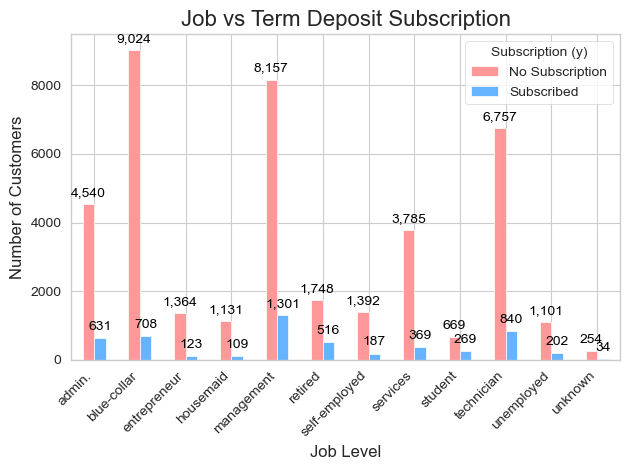

In [15]:
# Group by 'educatiJobon' and 'y', then count the number of occurrences
edu_y_counts = train_data.groupby(['job', 'y']).size().unstack()

# Create the bar graph
plt.figure(figsize=(10, 6))
ax = edu_y_counts.plot(kind='bar', stacked=False, color=['#FF9999', '#66B3FF'])

# Add chart title and labels
plt.title('Job vs Term Deposit Subscription', fontsize=16)
plt.xlabel('Job Level', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Show the legend and adjust the position
plt.legend(title='Subscription (y)', labels=['No Subscription', 'Subscribed'], loc='upper right')

# Add the bar labels with commas and display them on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',  # Format the number with commas
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), textcoords='offset points')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

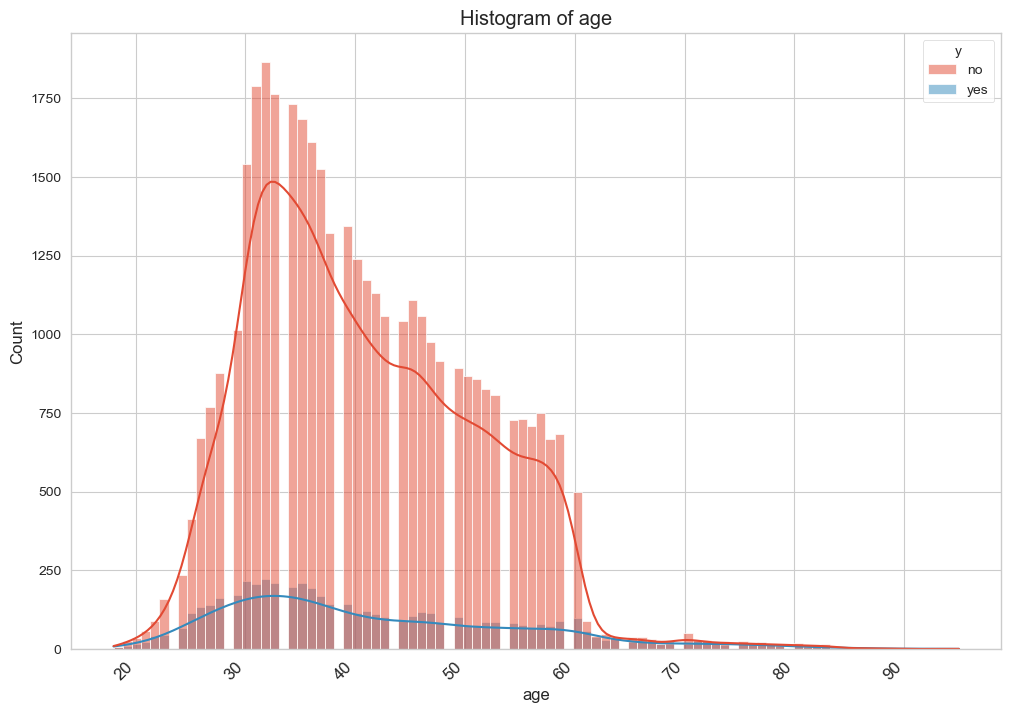

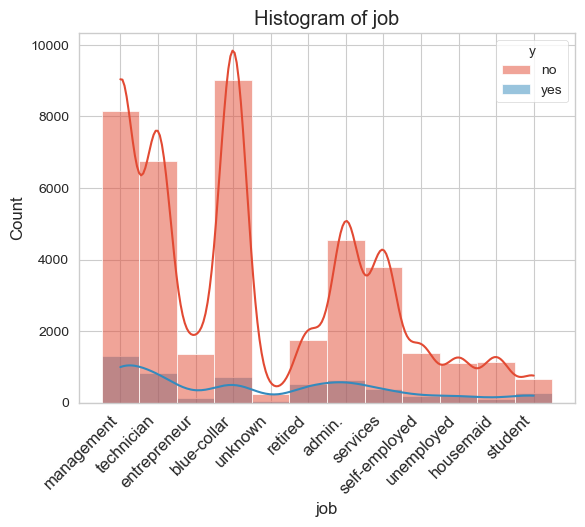

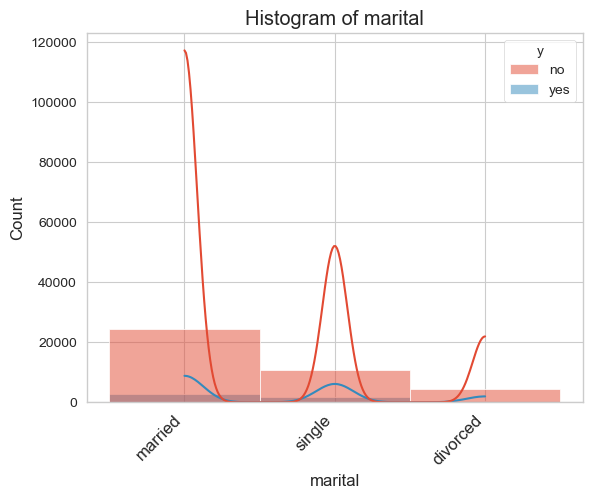

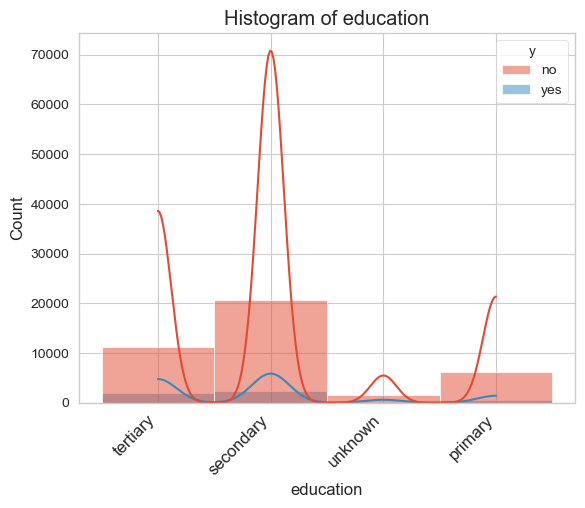

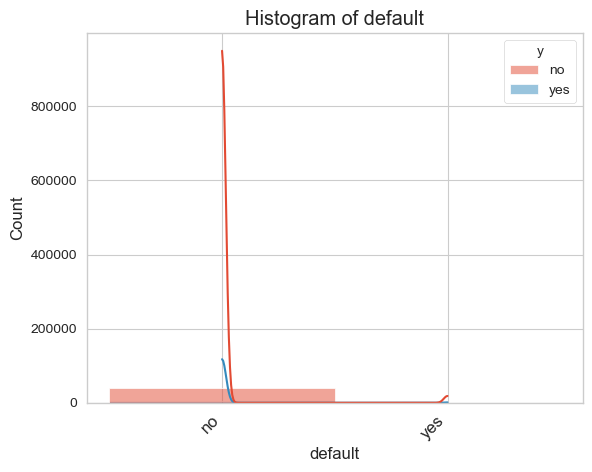

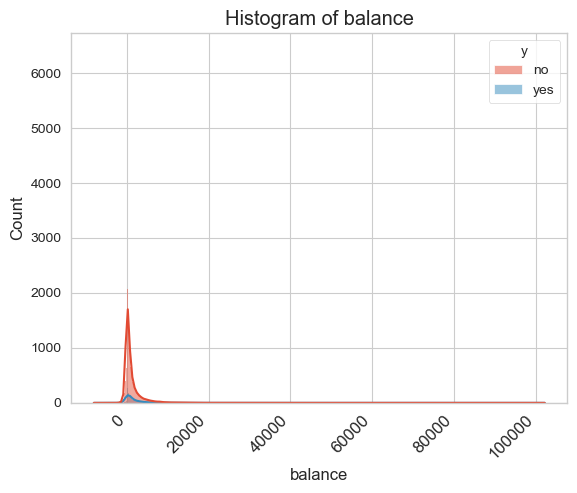

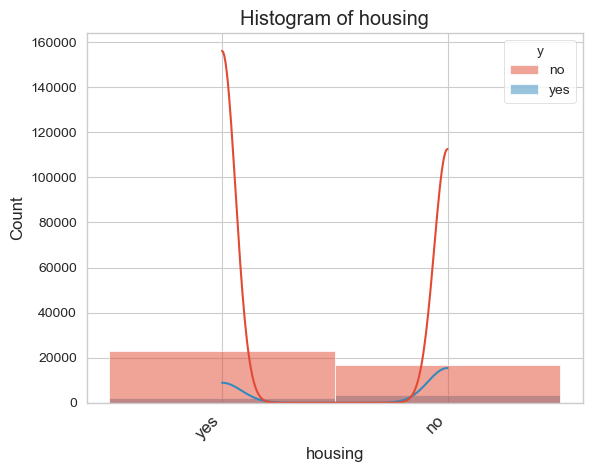

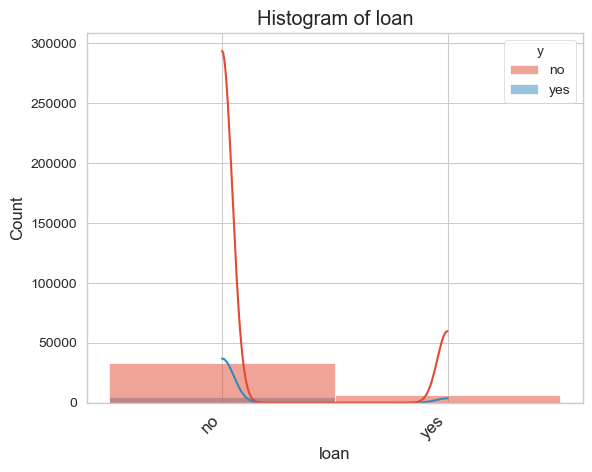

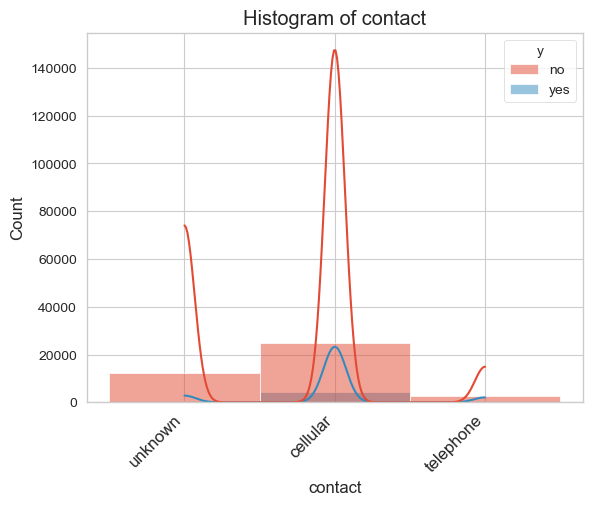

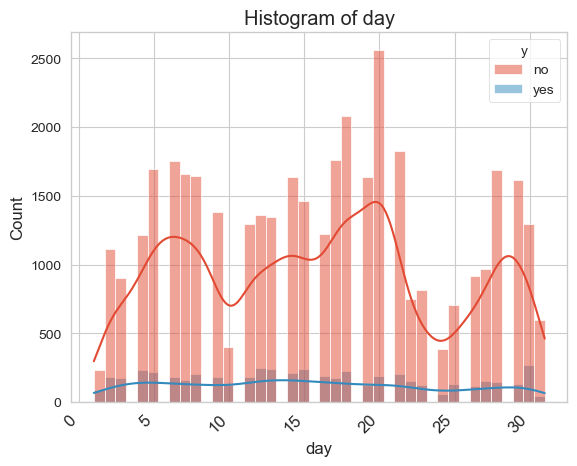

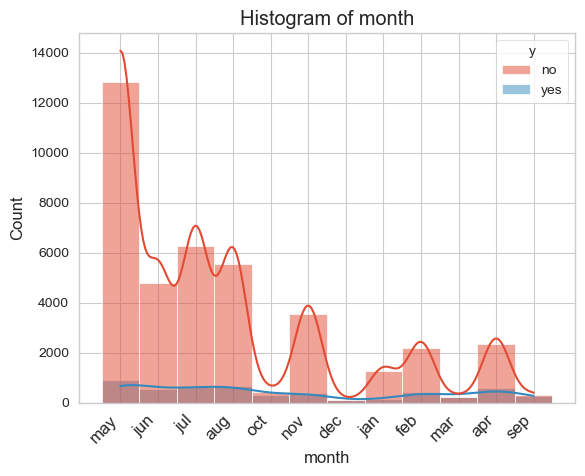

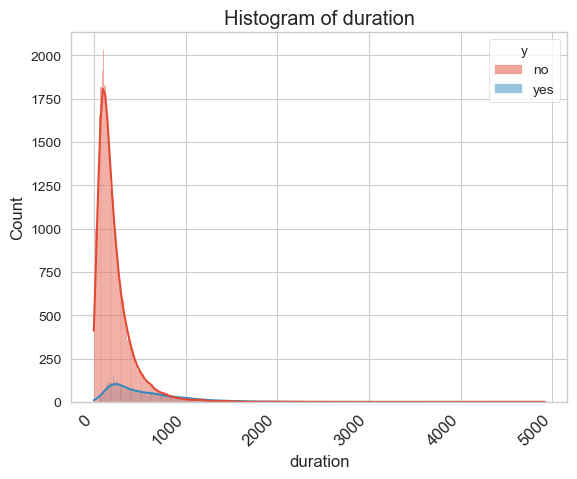

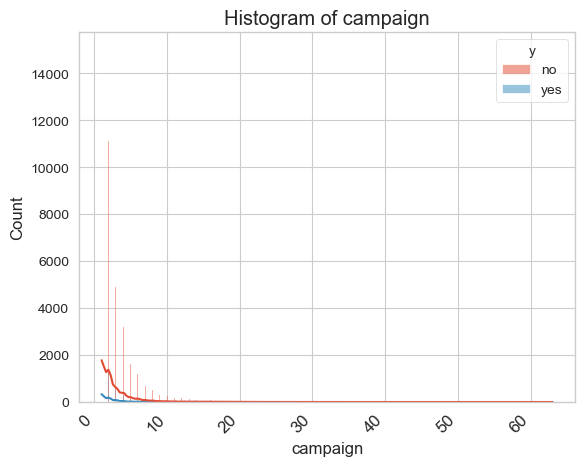

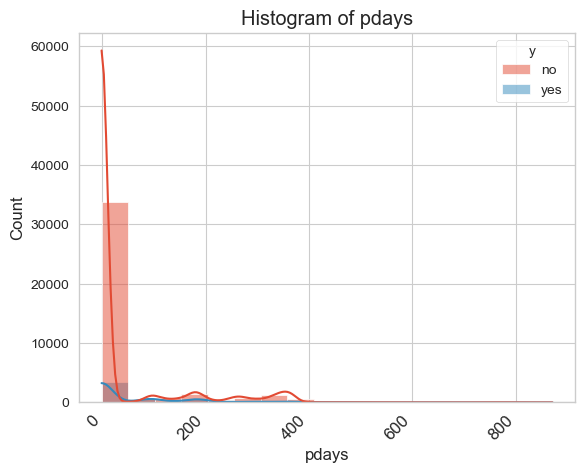

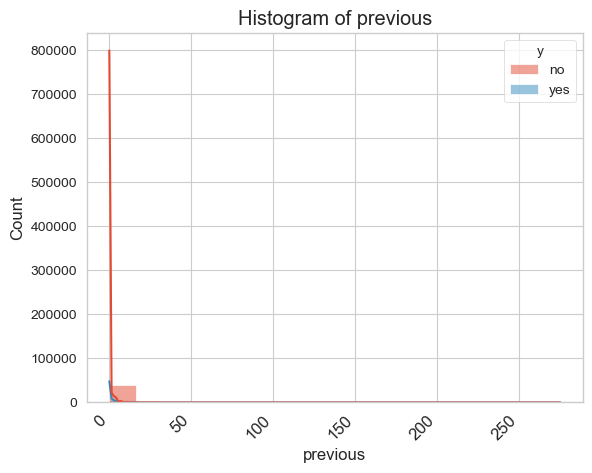

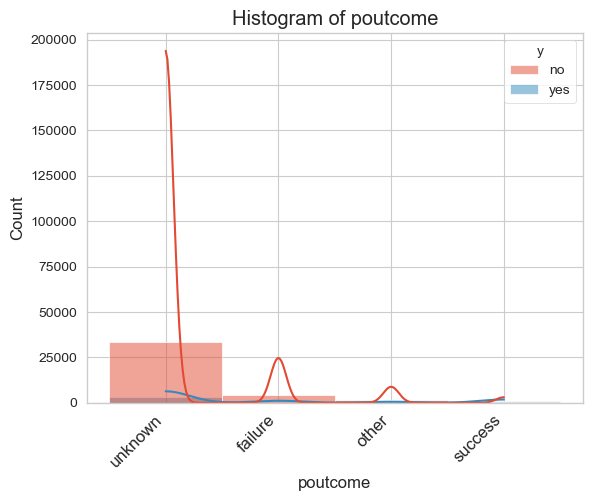

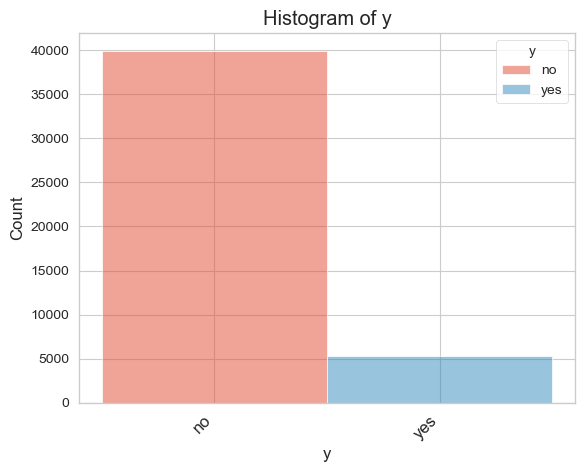

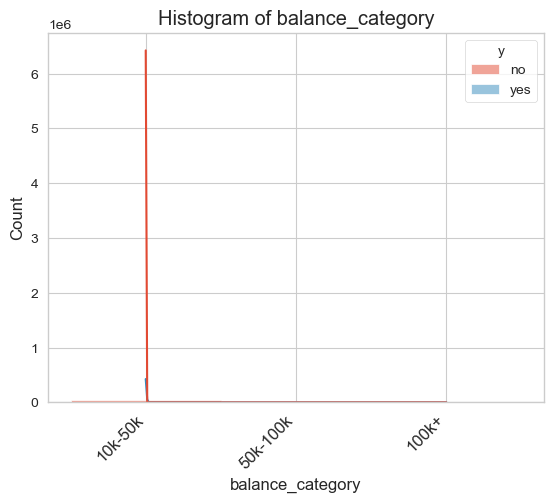

In [16]:
plt.figure(figsize=(12, 8))

for feature in train_data.columns:

    sns.histplot(data=train_data, x=feature, hue='y', kde=True)

    plt.title(f'Histogram of {feature}')

    plt.xlabel(feature)
    plt.xticks(rotation=45, fontsize=12, ha='right')
    plt.show()

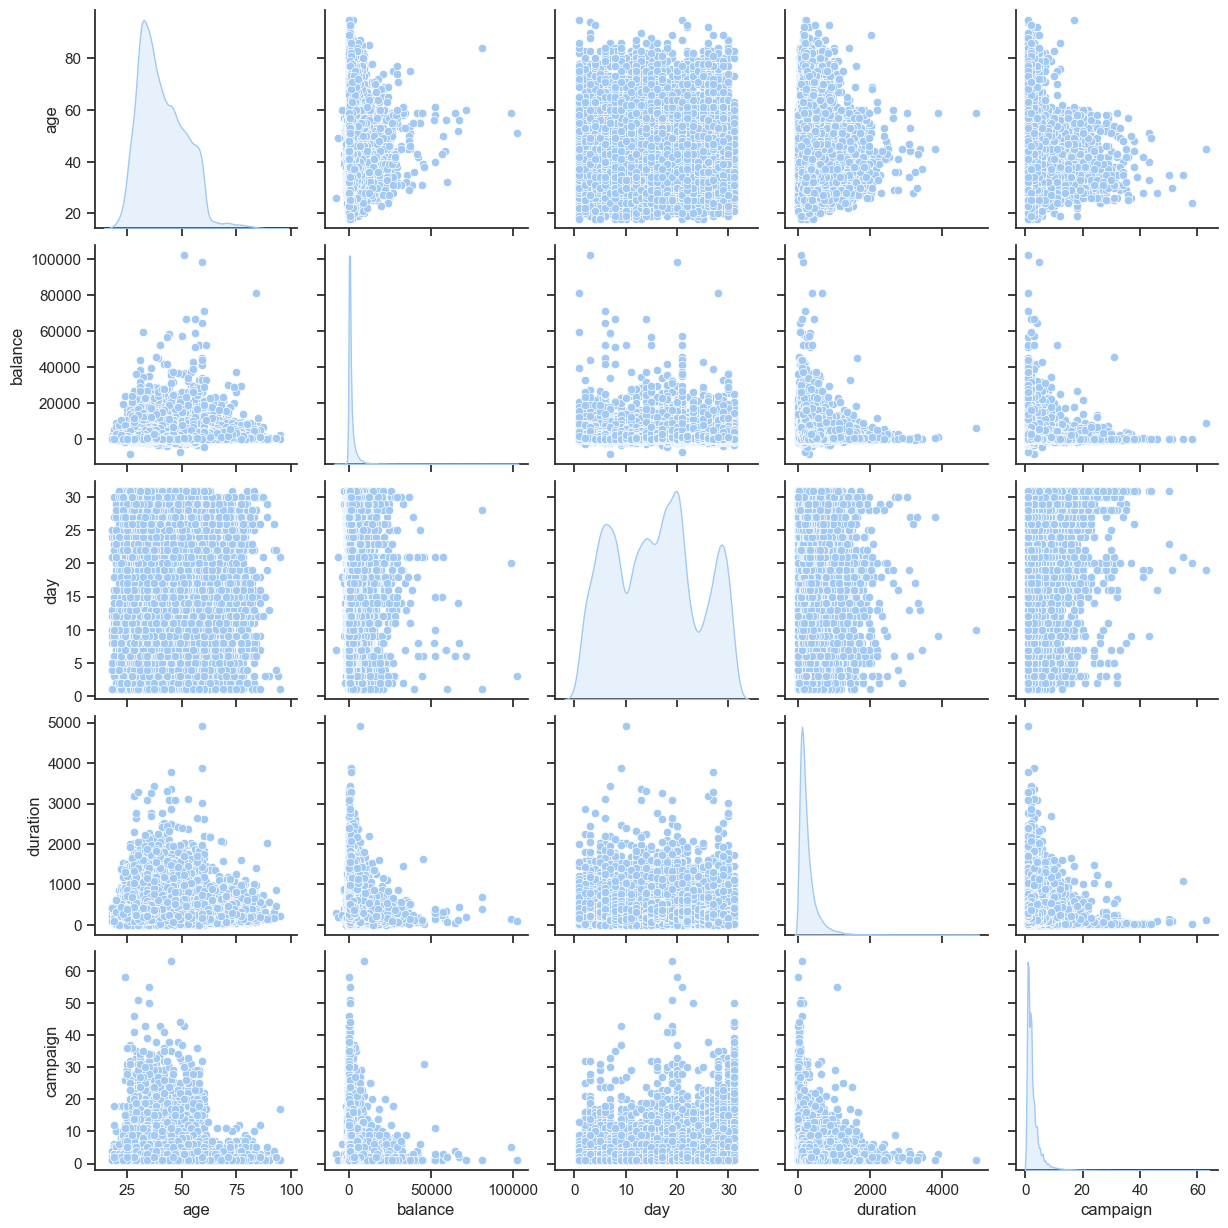

In [17]:
sns.set_theme(style="ticks", palette="pastel")

sns.pairplot(train_data[['age', 'balance', 'day', 'duration', 'campaign']], diag_kind='kde')

plt.show()

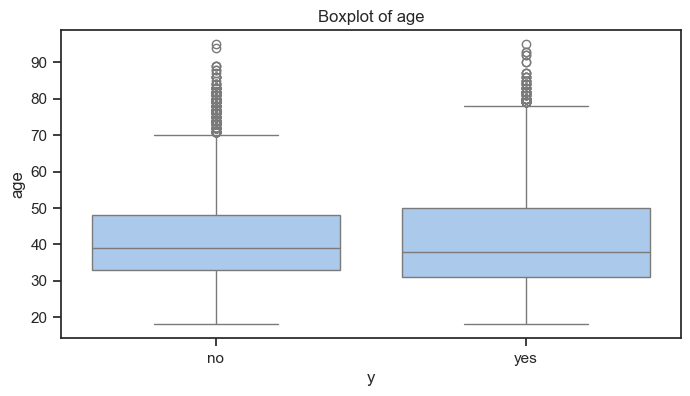

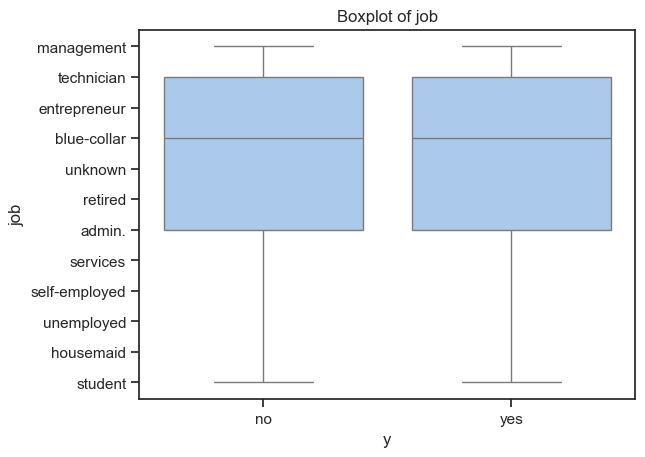

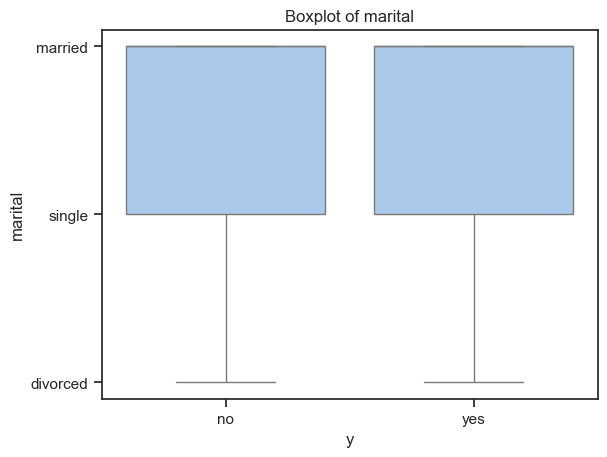

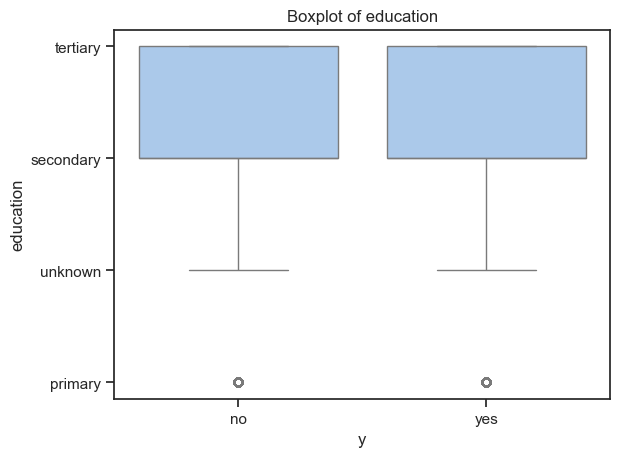

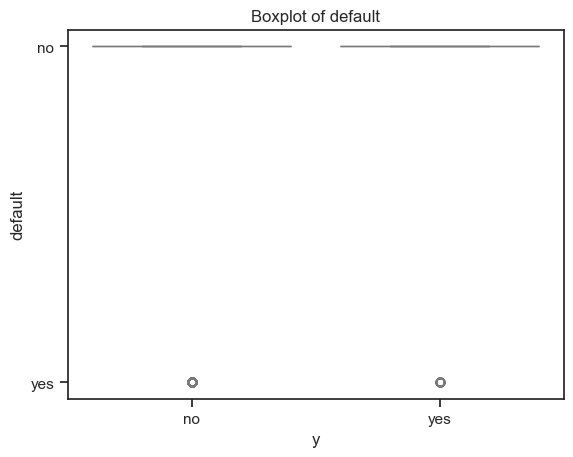

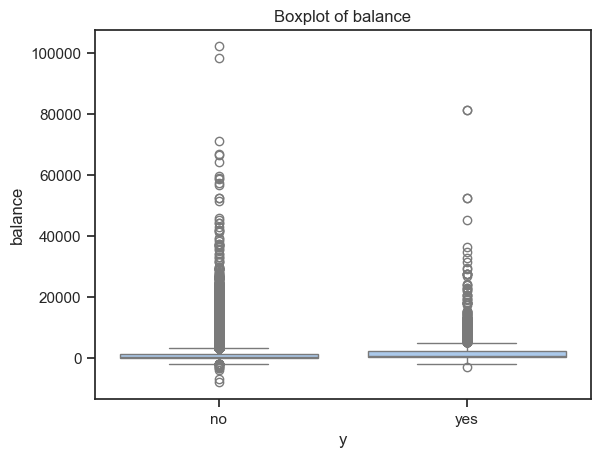

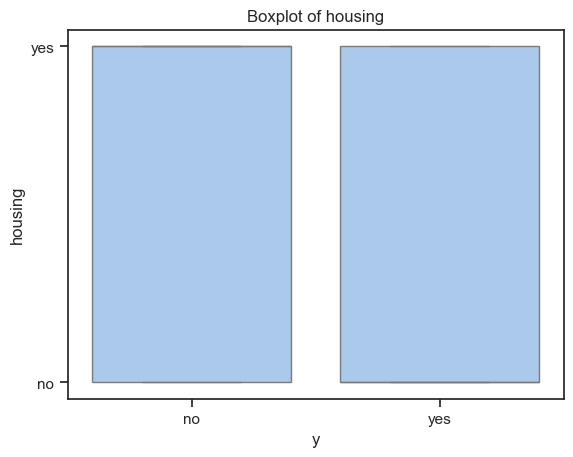

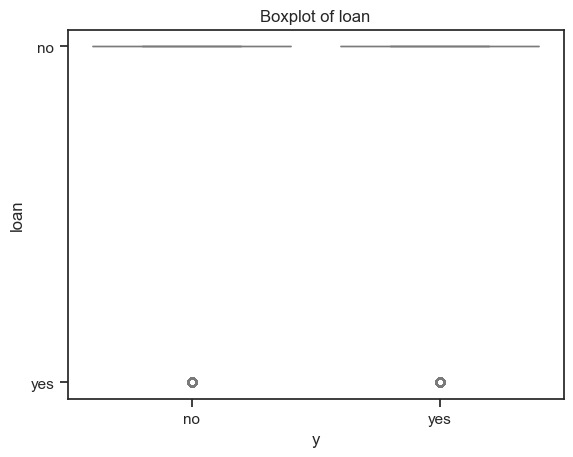

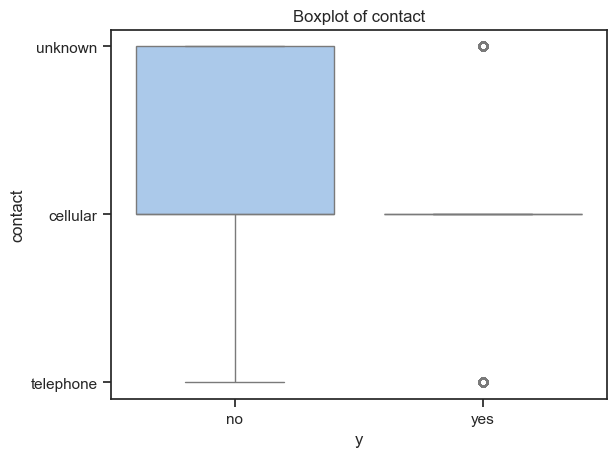

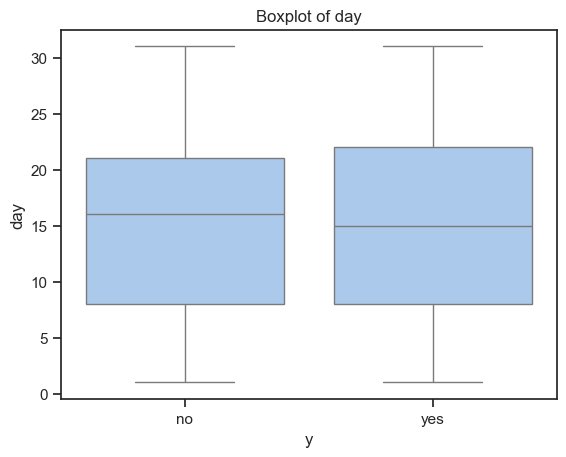

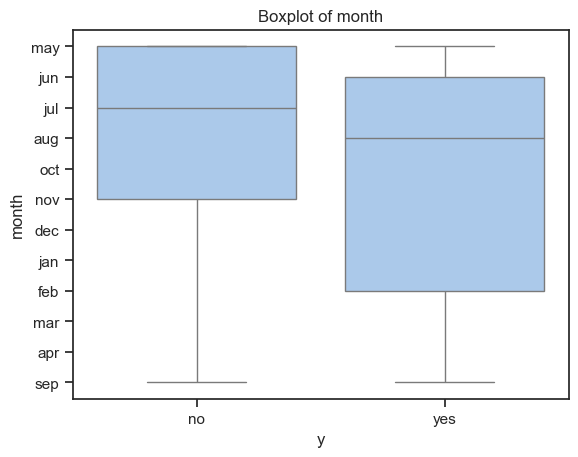

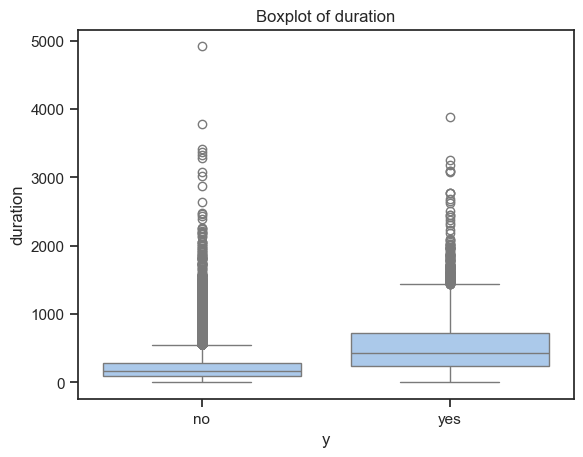

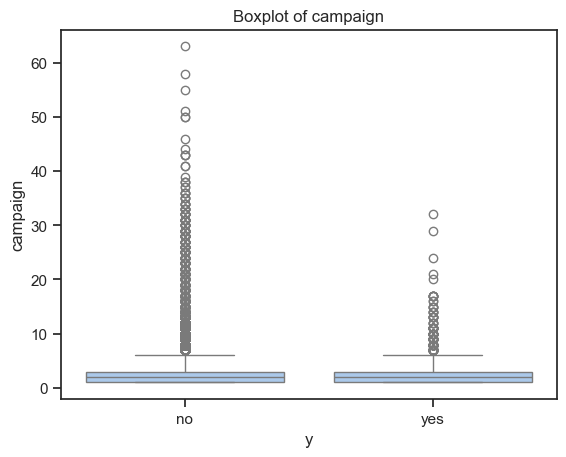

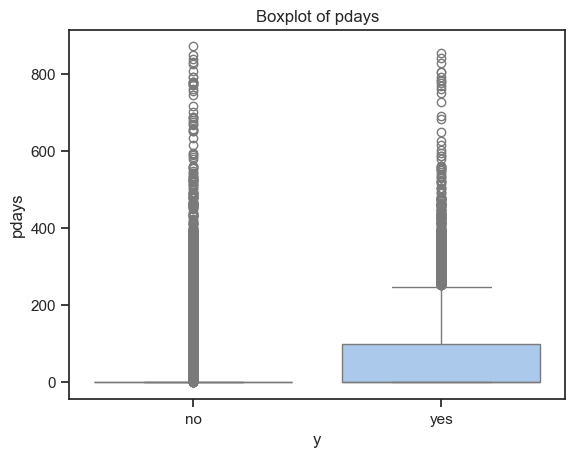

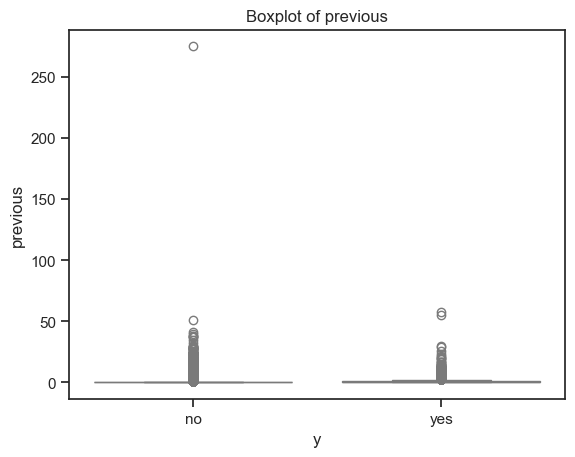

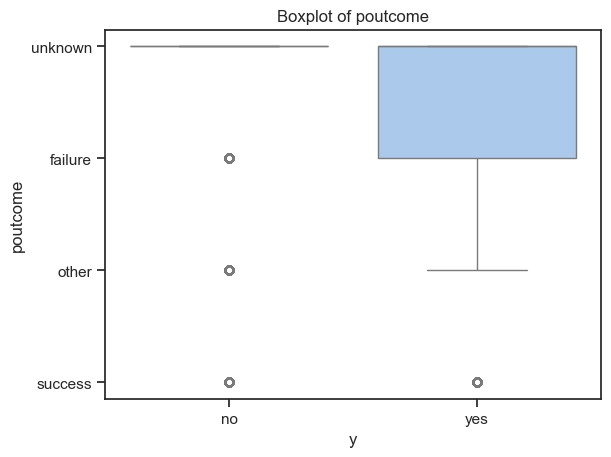

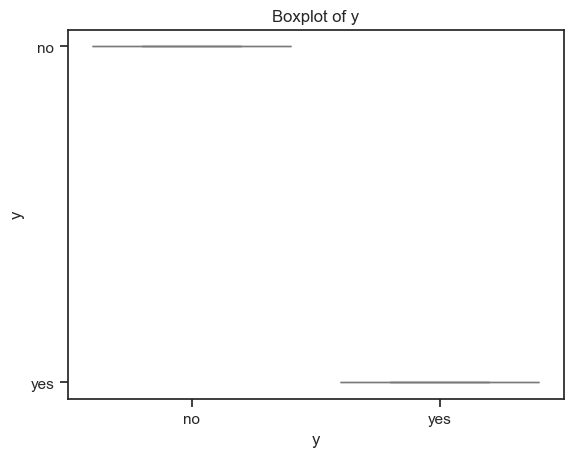

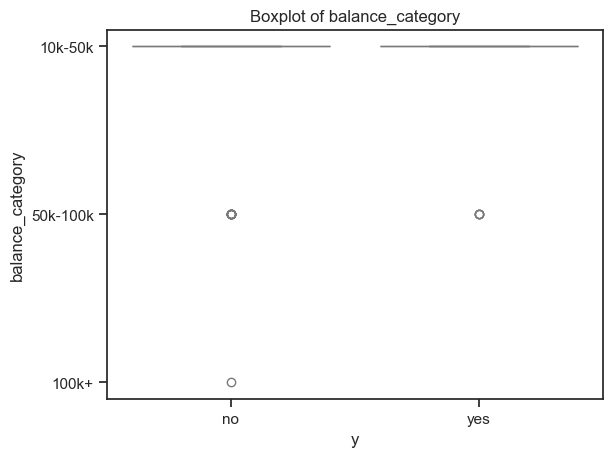

In [18]:
plt.figure(figsize=(8, 4))

for feature in train_data.columns:

    sns.boxplot(x=train_data['y'], y=train_data[feature])

    plt.title(f'Boxplot of {feature}')

    plt.xlabel('y')

    plt.ylabel(feature)

    plt.show()

<Axes: xlabel='y'>

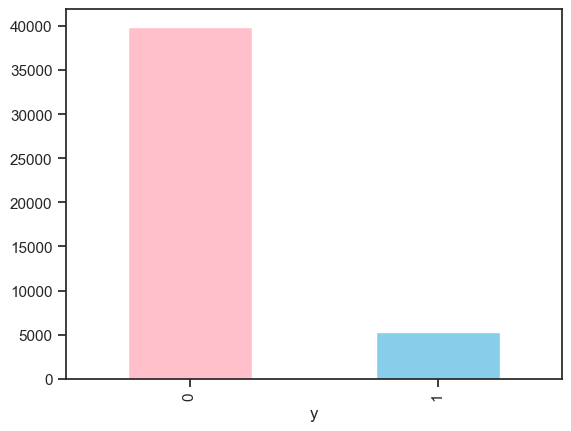

In [44]:
train_data["y"].value_counts().plot(kind = "bar", color = ["pink", "skyblue"])

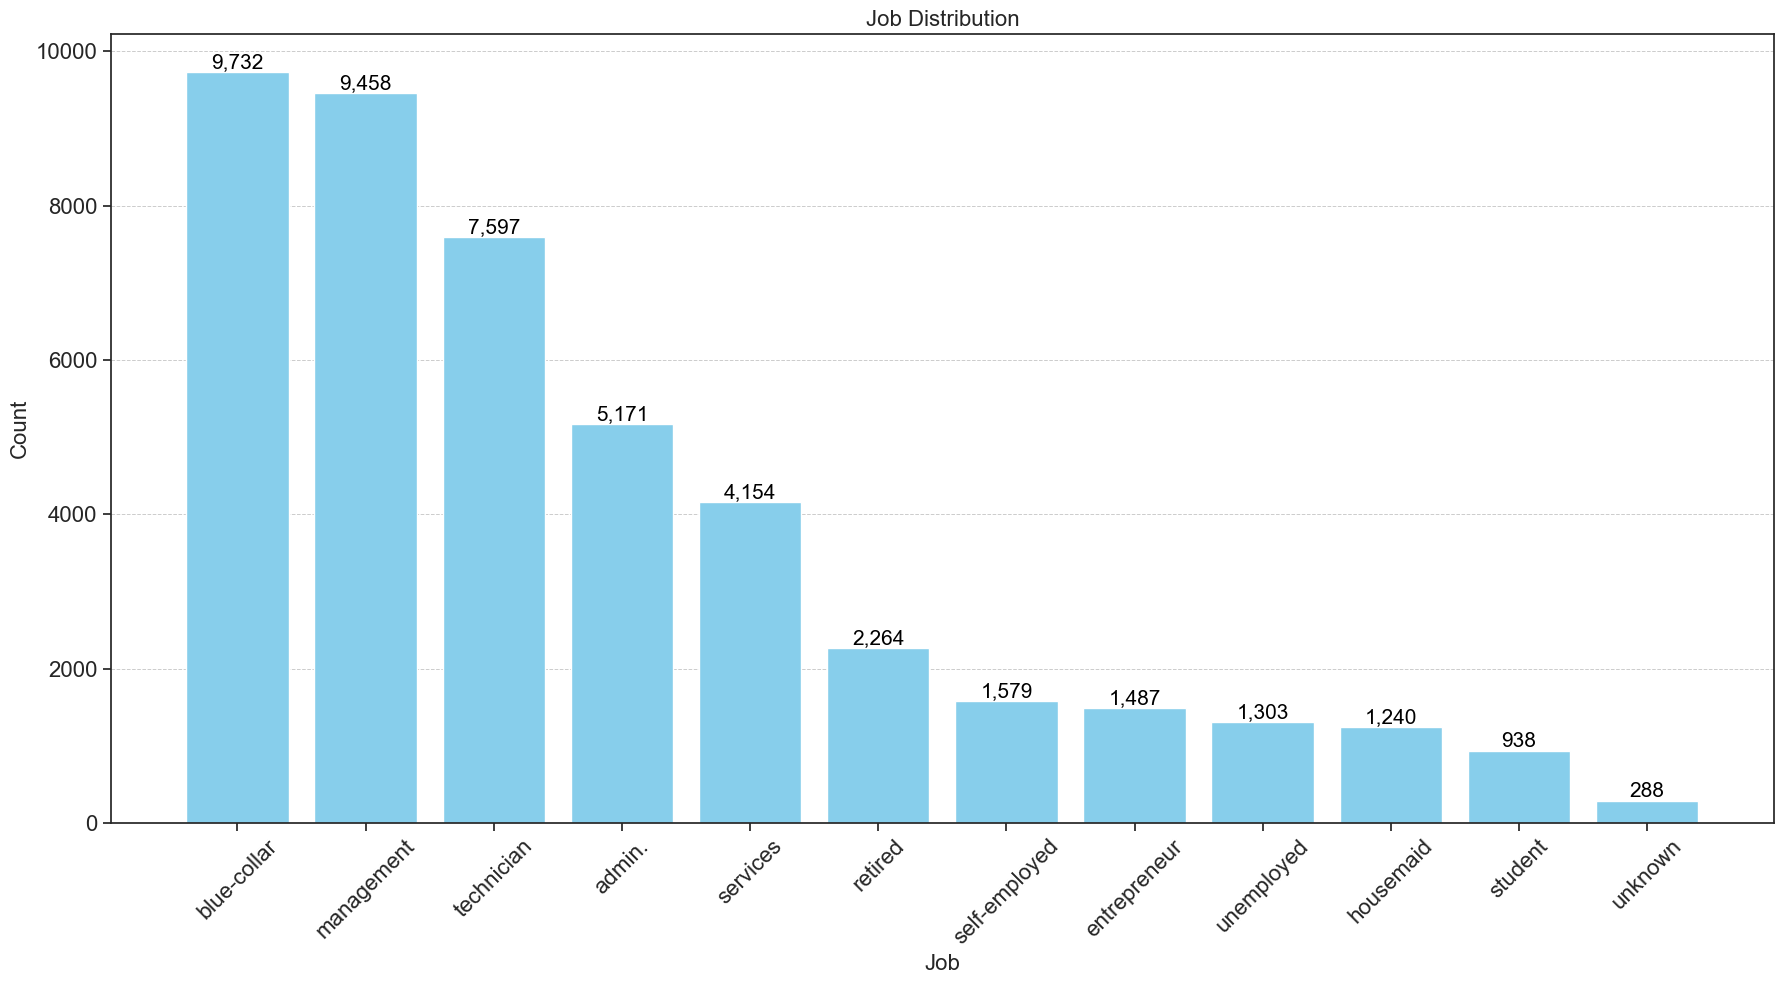

In [20]:
# Get job counts and sort them by values in descending order
jobcount = train_data['job'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(18, 10))
plt.bar(jobcount.index, jobcount.values, color='skyblue')
plt.xlabel('Job', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Job Distribution', fontsize=16)
plt.xticks(rotation=45, fontsize=16)  # Rotate x-axis labels to 45 degrees
plt.yticks(fontsize=16)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Annotating values on top of each bar with thousand separators
for i, value in enumerate(jobcount.values):
    plt.text(i, value + 50, f"{value:,}", ha='center', fontsize=15, color='black')

plt.tight_layout()
plt.show()

In [21]:
# Mapping for 'poutcome' column
poutcome_mapping = {'unknown': 0, 'failure': 0, 'other': 0, 'success': 1}

# Apply the mapping to train_data and test_data
train_data['poutcome'] = train_data['poutcome'].map(poutcome_mapping)
test_data['poutcome'] = test_data['poutcome'].map(poutcome_mapping)

In [22]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col] = le.fit_transform(train_data[col])
# Check the result
print(train_data.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  \
0    5      8       261         1     -1         0         0  0   
1    5      8       151         1     -1         0         0  0   
2    5      8        76         1     -1         0         0  0   
3    5      8        92         1     -1         0         0  0   
4    5      8       198         1     -1         0         0  0   

  balance_category  
0          10k-50k  
1          10k-50k  
2          10k-50k  
3          10k-50k  
4          10k-50k  


In [23]:
#converting test data from caegorical to numerical
le_1 = LabelEncoder()

# Apply label encoding to each categorical column
for col in test_data.select_dtypes(include=['object']).columns:
    test_data[col] = le_1.fit_transform(test_data[col])
# Check the result
print(test_data.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1     -1         0         0  0  
1   11      8       220         1    339         4         0  0  
2   16      0       185         1    330         1         0  0  
3    3      6       199         4     -1         0         0  0  
4    5      8       226         1     -1         0         0  0  


<Axes: >

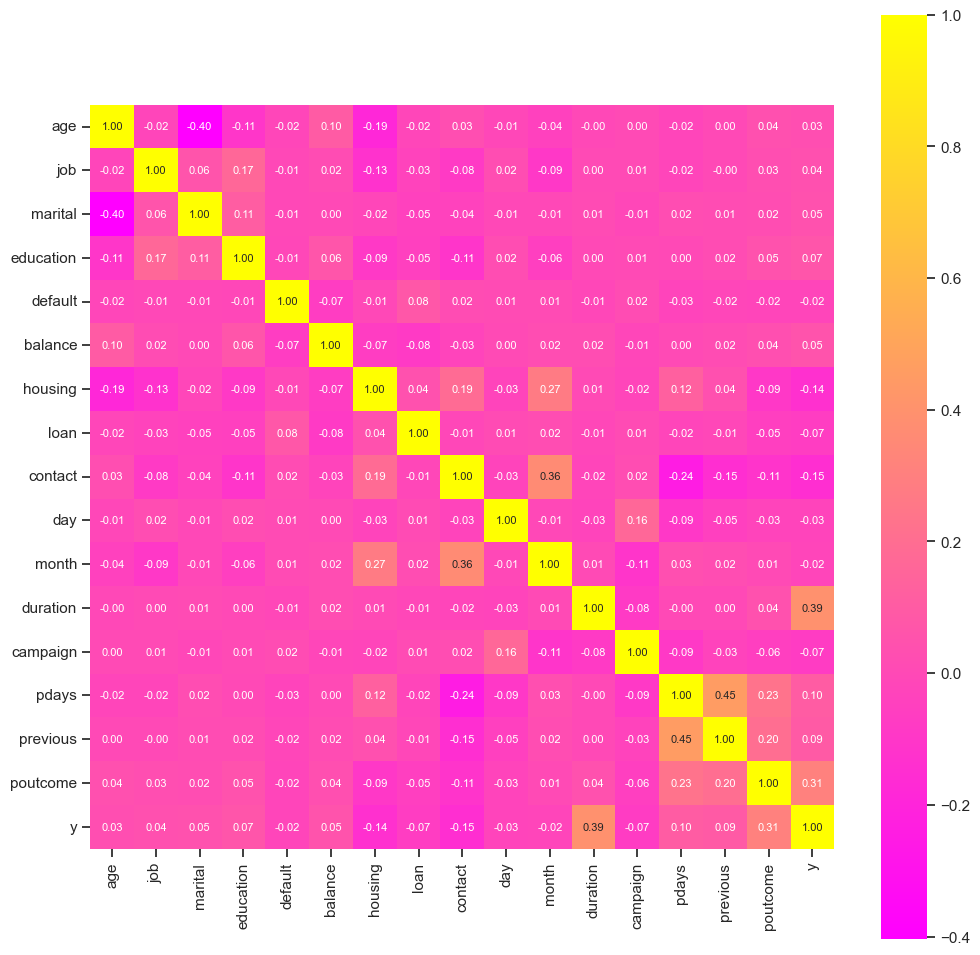

In [24]:
train_data=train_data.drop(columns=['balance_category'])
correlation=train_data.corr()
plt.figure(figsize =(12, 12)) 

sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='spring')

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scale=scaler.fit_transform(train_data)
scale=scaler.fit_transform(test_data)

### <span style="color:white;background-color:grey;">FEATURE IMPORTANCE</span>

In [26]:
#Feature Importance: Chhosing Important Features
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = train_data.drop(columns=['y'])
y = train_data['y']

# Fit a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

      Feature  Importance
11   duration    0.287871
5     balance    0.109946
0         age    0.102078
9         day    0.088717
10      month    0.085509
15   poutcome    0.065052
13      pdays    0.048819
1         job    0.048738
12   campaign    0.037564
3   education    0.027419
14   previous    0.022739
6     housing    0.022337
2     marital    0.021315
8     contact    0.020173
7        loan    0.009887
4     default    0.001837


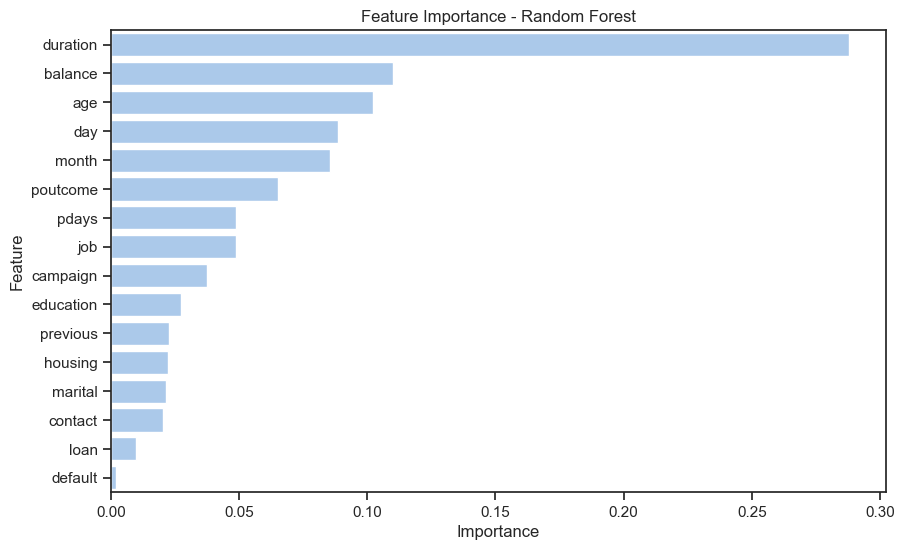

In [27]:
# Plot horizontal bar graph for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [28]:
X_train=train_data.drop(['loan','contact','marital','default','poutcome','y'], axis = 1)
X_test=test_data.drop(['loan','contact','marital','default','poutcome','y'], axis = 1)
y_train=train_data['y']
y_test=test_data['y']

In [29]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='most_frequent')  # You can also use 'median' or 'most_frequent'

# Fit and transform the training data
train_imputed = imputer.fit_transform(X_train)
test_imputed=imputer.fit_transform(X_test)
#test_imputed = imputer.transform(test_data)  # Use transform on test data

### <span style="color:white;background-color:grey;">BASE MODEL: LOGISTIC REGRESSION MODEL</span>

In [30]:
#Base Model is Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with desired parameters
model = LogisticRegression(
    penalty='l2',       # Regularization type ('l2' is the default)
    C=1.0,              # Inverse of regularization strength (smaller = stronger regularization)
    max_iter=1000,      # Maximum number of iterations for convergence
    solver='lbfgs',     # Optimization algorithm (default for small/medium datasets)
    random_state=42     # Ensures reproducibility
)

# Fit the model to the training data
model.fit(train_imputed, y_train)

# Print the coefficients and intercept (optional)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [[-2.43740258e-02 -1.29336951e-02  1.19286387e-01  2.29902396e-05
  -1.76032461e+00 -1.54251204e-02 -1.30343322e-02  3.78102438e-03
  -1.39271253e-01  3.16116950e-03  6.74530178e-02]]
Model Intercept: [-1.18163242]


C:\Users\rkeoye\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# Predict on the test data
y_pred = model.predict(test_imputed)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 88.65%

Confusion Matrix:
[[3908   92]
 [ 421  100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4000
           1       0.52      0.19      0.28       521

    accuracy                           0.89      4521
   macro avg       0.71      0.58      0.61      4521
weighted avg       0.86      0.89      0.86      4521



### <span style="color:white;background-color:grey;">KNN MODEL</span>

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define parameter grid
my_params = {
    'n_neighbors': [7, 9, 11],
    'p': [3, 5, 7]
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform Grid Search with 5-fold cross-validation
grid = GridSearchCV(knn, my_params, cv=5, verbose=1, n_jobs=-1)
grid.fit(train_imputed, y_train)

# Create a DataFrame with relevant results
grid_search_results = pd.DataFrame(grid.cv_results_)[
    ['mean_test_score', 'std_test_score', 'params', 'rank_test_score', 'mean_fit_time']
]

# Sort results by rank
grid_search_results = grid_search_results.sort_values(by='rank_test_score')

# Display the top results
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
print("\nGrid Search Results:")
print(grid_search_results)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'n_neighbors': 11, 'p': 3}
Best Score: 0.8767331109888283

Grid Search Results:
   mean_test_score  std_test_score                       params  \
6         0.876733        0.016921  {'n_neighbors': 11, 'p': 3}   
7         0.876600        0.016684  {'n_neighbors': 11, 'p': 5}   
8         0.876291        0.017200  {'n_neighbors': 11, 'p': 7}   
5         0.875561        0.017666   {'n_neighbors': 9, 'p': 7}   
4         0.875340        0.017678   {'n_neighbors': 9, 'p': 5}   
3         0.875052        0.018147   {'n_neighbors': 9, 'p': 3}   
0         0.873813        0.018911   {'n_neighbors': 7, 'p': 3}   
2         0.873769        0.018687   {'n_neighbors': 7, 'p': 7}   
1         0.873725        0.018830   {'n_neighbors': 7, 'p': 5}   

   rank_test_score  mean_fit_time  
6                1       0.108126  
7                2       0.109297  
8                3       0.106221  
5                4       0.

In [33]:
model=KNeighborsClassifier(n_neighbors = 11, p=3)

model.fit(train_imputed,y_train)

y_pred=model.predict(test_imputed)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [35]:
# Print Accuracy
print(f"Accuracy: {accuracy:.2%}")  # Format accuracy as a percentage with two decimal places

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Print Classification Report
print("\nClassification Report:")
print(classification_rep)

Accuracy: 90.09%

Confusion Matrix:
[[3890  110]
 [ 338  183]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      4000
           1       0.62      0.35      0.45       521

    accuracy                           0.90      4521
   macro avg       0.77      0.66      0.70      4521
weighted avg       0.89      0.90      0.89      4521



### <span style="color:white;background-color:grey;">RANDOM FOREST MODEL</span>

In [36]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid for RandomizedSearchCV
random_grid = {
    'n_estimators': np.linspace(200, 2000, num=100, dtype=int).tolist(),  # Number of trees
    'max_features': ['auto', 'sqrt'],  # Features to consider at each split
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples required at each leaf node
    'bootstrap': [True, False],  # Bootstrap sampling
}

# Display the random grid
print("Random Grid for RandomizedSearchCV:")
print(random_grid)

Random Grid for RandomizedSearchCV:
{'n_estimators': [200, 218, 236, 254, 272, 290, 309, 327, 345, 363, 381, 400, 418, 436, 454, 472, 490, 509, 527, 545, 563, 581, 600, 618, 636, 654, 672, 690, 709, 727, 745, 763, 781, 800, 818, 836, 854, 872, 890, 909, 927, 945, 963, 981, 1000, 1018, 1036, 1054, 1072, 1090, 1109, 1127, 1145, 1163, 1181, 1200, 1218, 1236, 1254, 1272, 1290, 1309, 1327, 1345, 1363, 1381, 1400, 1418, 1436, 1454, 1472, 1490, 1509, 1527, 1545, 1563, 1581, 1600, 1618, 1636, 1654, 1672, 1690, 1709, 1727, 1745, 1763, 1781, 1800, 1818, 1836, 1854, 1872, 1890, 1909, 1927, 1945, 1963, 1981, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [37]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,  # Hyperparameter grid
    n_iter=100,                       # Number of parameter combinations to try
    cv=3,                             # 3-fold cross-validation
    verbose=2,                        # Display training progress
    random_state=42,                  # Reproducibility
    n_jobs=-1                         # Use all available CPU cores
)

# Fit the RandomizedSearchCV on the training data
rf_random.fit(X_train, y_train)

# Retrieve and display the best parameters
best_params = rf_random.best_params_
print("Best Parameters Found:")
print(best_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters Found:
{'n_estimators': 1745, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [38]:
randomforestmodel=RandomForestClassifier(n_estimators= 1745,
 min_samples_split = 5,
 min_samples_leaf = 4,
 max_features = 'sqrt',
 max_depth= 90,
 bootstrap= True)

In [39]:
randomforestmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=90, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1745)

In [40]:
y_pred_rf=randomforestmodel.predict(X_test)

In [41]:
# Predict on the training data
y_pred_train = randomforestmodel.predict(X_train)

# Calculate accuracy for the training data
rf_train_accuracy = accuracy_score(y_train, y_pred_train)

# Confusion Matrix for the training data
rf_train_conf_matrix = confusion_matrix(y_train, y_pred_train)

# Classification Report for the training data
rf_train_classification_rep = classification_report(y_train, y_pred_train)

# Print the accuracy as a percentage for the training data
print(f"Random Forest Training Accuracy: {rf_train_accuracy:.2%}")

# Print the confusion matrix for the training data
print("\nTraining Confusion Matrix:")
print(rf_train_conf_matrix)

# Print the classification report for the training data
print("\nTraining Classification Report:")
print(rf_train_classification_rep)

Random Forest Training Accuracy: 95.98%

Training Confusion Matrix:
[[39801   121]
 [ 1697  3592]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     39922
           1       0.97      0.68      0.80      5289

    accuracy                           0.96     45211
   macro avg       0.96      0.84      0.89     45211
weighted avg       0.96      0.96      0.96     45211



In [42]:
# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Classification Report
rf_classification_rep = classification_report(y_test, y_pred_rf)

# Print the accuracy as a percentage
print(f"Random Forest Accuracy: {rf_accuracy:.2%}")

# Print the confusion matrix
print("\nConfusion Matrix:")
print(rf_conf_matrix)

# Print the classification report
print("\nClassification Report:")
print(rf_classification_rep)

Random Forest Accuracy: 96.04%

Confusion Matrix:
[[3981   19]
 [ 160  361]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4000
           1       0.95      0.69      0.80       521

    accuracy                           0.96      4521
   macro avg       0.96      0.84      0.89      4521
weighted avg       0.96      0.96      0.96      4521



### Model Performance Analysis

#### **Training Set**:
- **Accuracy**: 95.96%
- **Confusion Matrix**:
  - True Negatives (TN): 39,792
  - False Positives (FP): 130
  - False Negatives (FN): 1,695
  - True Positives (TP): 3,594
- **Classification Report**:
  - **Precision (Class 0)**: 0.96
  - **Recall (Class 0)**: 1.00
  - **F1-Score (Class 0)**: 0.98
  - **Precision (Class 1)**: 0.97
  - **Recall (Class 1)**: 0.68
  - **F1-Score (Class 1)**: 0.80

#### **Test Set**:
- **Accuracy**: 96.11%
- **Confusion Matrix**:
  - True Negatives (TN): 3,980
  - False Positives (FP): 20
  - False Negatives (FN): 156
  - True Positives (TP): 365
- **Classification Report**:
  - **Precision (Class 0)**: 0.96
  - **Recall (Class 0)**: 0.99
  - **F1-Score (Class 0)**: 0.98
  - **Precision (Class 1)**: 0.95
  - **Recall (Class 1)**: 0.70
  - **F1-Score (Class 1)**: 0.81

### Observations:
1. **Accuracy**: The model performs similarly on both training and test sets, with a slight increase in accuracy on the test set (96.11% vs. 95.96%).
2. **Class 0 (Negative class)**:
   - High precision, recall, and F1-score on both sets, showing the model is very effective in correctly identifying the negative class.
3. **Class 1 (Positive class)**:
   - Slight decrease in recall for Class 1 on the test set (70% vs. 68%), indicating the model is slightly better at identifying positive cases in the test set.
   - Precision for Class 1 remains very similar between the training and test sets (around 0.95–0.97).
   - The F1-score for Class 1 also shows similar results on both sets, indicating a good balance between precision and recall.


#### <span style="color:white;background-color:grey;">PREDICTING PROBABILITY OF SUBSCRIPTION FOR EACH CUSTOMER</span>

In [43]:
# Assuming the RandomForest model (rf) has been trained already

# Predict probabilities for each customer
probabilities =randomforestmodel.predict_proba(X_test)[:, 1]  # Get probabilities for class '1' (subscribed)

# Add probabilities to the test data
test_data_with_probs = X_test.copy()
test_data_with_probs['subscription_prob'] = probabilities

# Rank customers by their subscription probability (highest first)
high_potential_customers = test_data_with_probs.sort_values(by='subscription_prob', ascending=False)

# Select top N customers with the highest probability (e.g., top 10%)
top_10_percent = high_potential_customers.head(int(len(high_potential_customers) * 0.1))

# Display the top customers to target for marketing
print(top_10_percent[['subscription_prob']].head())

# Optional: You can also filter based on a specific probability threshold
threshold = 0.7  # Example threshold for a high chance of subscribing
high_confidence_customers = test_data_with_probs[test_data_with_probs['subscription_prob'] >= threshold]

# Display these customers
print(high_confidence_customers[['subscription_prob']].head(10))

      subscription_prob
855            0.888934
1485           0.866462
1469           0.852220
3684           0.847279
3304           0.847220
     subscription_prob
30            0.779584
33            0.703421
38            0.749490
70            0.752592
83            0.814366
110           0.736779
156           0.728536
164           0.778796
295           0.700100
328           0.734012


### <span style="color:white;background-color:grey;">CONCLUSIONS</span>

1. **Most Important Predictors**:
   - **Duration (0.295)**: Longer interactions significantly increase the likelihood of subscription.
   - **Balance (0.113)**: Higher average yearly balance is associated with a higher probability of subscribing.
   - **Age (0.108)**: Older customers are more likely to subscribe to a term deposit.

2. **Moderate Predictors**:
   - **Day (0.095) and Month (0.094)**: Timing of the last contact influences subscription, indicating seasonality.
   - **Pdays (0.065)**: Recent contact increases the likelihood of subscription.
   - **Job (0.050)**: Job type impacts subscription decisions, with managerial or professional jobs more likely to subscribe.
   - **Campaign (0.039)**: More contacts during the campaign have a positive but smaller impact.

3. **Less Significant Predictors**:
   - **Housing (0.029) and Education (0.029)**: These factors show minor influence.
   - **Previous Contacts (0.028)**: Repeated contacts have a smaller effect.
   - **Marital Status (0.022) and Contact Type (0.021)**: Minimal impact on subscription likelihood.
   - **Loan (0.011) and Default (0.002)**: These features have very low impact.
   - **Poutcome (0.000)**: Previous campaign outcome does not influence the decision.

#### Insights:
- **Key Factors**: Duration of the call, balance, and age are the strongest predictors.
- **Campaign Timing**: The day, month, and timing of contact matter for successful subscriptions.
- **Demographics and Financial Stability**: Job type and balance are secondary but important indicators.

Based on the model evaluations:

- **Random Forest** The model generalizes well from training to testing with consistent performance(96.11%), particularly in predicting the negative class (Class 0). The slight improvement in recall for the positive class (Class 1) on the test set may indicate better generalization or data characteristics in the test set. The model seems well-calibrated with no significant overfitting or underfitting.
- **Logistic Regression** shows decent accuracy (88.56%) but struggles with identifying subscribers, having low recall and F1-score for Class 1.
- **KNN** has good accuracy (90.09%) but also faces challenges with recall for Class 1, similar to Logistic Regression. 

Optimizing Marketing Strategies Based on Subscription Probability:
 
- Customers with high `subscription_prob` values (e.g., 0.892162, 0.871691, 0.870282) have a high likelihood of conversion.   
- Customers with `subscription_prob` values between 0.75 and 0.80 represent the next tier of likely conversions. While not as urgent as the highest-probability customers, this segment still holds significant potential and should be targeted with focused outreach.  
- To maximize conversion rates with minimal effort, prioritize customers with `subscription_prob` values above 0.8. This ensures that marketing resources are allocated to those most likely to convert, improving efficiency and outcomes.  
- Customers with lower `subscription_prob` values (e.g., 0.716083, 0.725284) are less likely to convert and should either be deprioritized or approached with alternative strategies, such as offering incentives or alternative products, rather than standard outreach efforts.

### <span style="color:white;background-color:grey;">RECOMMENDATIONS</span>
- Focus on **longer, high-quality interactions**.
- Tailor campaigns based on **age** and **balance**.
- Utilize **personalized outreach strategies** to improve subscription rates.
- Focus on **Random Forest** for its overall performance, and improve recall for the minority class by addressing class imbalance and tuning model parameters.
- **Target High-Probability Customers**: Focus marketing efforts on customers with high `subscription_prob` (e.g., 0.892162, 0.871691, 0.870282). These customers are highly likely to subscribe, requiring minimal outreach for better conversion rates.

- **Use a Probability Threshold**: Consider customers with probabilities around 0.75–0.80 for the next tier of targeted outreach. While not as urgent as the highest-probability customers, they still represent a valuable segment to target.

- **Optimize Resource Allocation**: Allocate resources efficiently by prioritizing customers with probabilities above 0.8. This ensures higher conversion rates with less effort on low-probability customers.

- **Reduce Unnecessary Outreach**: Deprioritize customers with lower probabilities (e.g., 0.716083, 0.725284), or approach them with different strategies, such as offering incentives or alternate products.